# Closet Tune - Fashion MNIST

<div style='display: flex:'>
<img src='https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png' width=400>
</div>

# 0. Libraries

In [2]:
# Usage of tensorflow is only for data importation pourposes
import tensorflow as tf

# Needed libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

# 1. Business Understanding


## 1.1. Problem Description:

In this project, we address the challenge of classifying images of clothing items using the FASHION MNIST dataset. The main problem lies in developing a machine learning model capable of recognizing and categorizing different types of clothing, such as t-shirts, pants, shoes, and other fashion items, in grayscale images. This classification process is essential for various applications, from online fashion recommendation to inventory optimization in retail stores. The primary goal is to achieve accurate classification of clothing items, which will enhance the customer experience and provide significant value to the business.

## 1.2. General Objective:
The main objective of this project is to train an image classification model for the FASHION MNIST dataset.


## 1.4. Specific Objectives:
* Develop an image classification model with an accuracy greater than 85% on the FASHION MNIST dataset.
* Create an app that allows users to draw on a canvas/upload images and receive predictions about the type of clothing.

# 2. Data Understanding


## 2.1. About the Dataset

* Context:

    Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 pixel grayscale image associated with a label from 1 of 10 classes.
    Zalando created Fashion-MNIST as a direct replacement for the original MNIST dataset to evaluate machine learning algorithms. It shares the same image size and structure of training and testing splits.

    The original MNIST dataset primarily contains handwritten digits and is highly regarded by the Artificial Intelligence/Machine Learning/Data Science community, which uses it as a benchmark to validate their algorithms. In fact, MNIST is often the first dataset researchers test. It is said that: "If it doesn't work on MNIST, it won't work at all."

* Context:

    Each image has a height and width of 28 pixels, totaling 784 pixels. Each pixel has a single associated value indicating the lightness or darkness of the pixel, where higher numbers represent darker shades. This pixel value is an integer ranging from 0 to 255. The training and testing datasets have a total of 785 columns. The first column contains the class labels representing the clothing item. The remaining columns contain the pixel values associated with the corresponding image.

* Labels:

    Each of the training and testing examples is assigned to one of these labels:
    * 0 -> T-shirt/top
    * 1 -> Trouser
    * 2 -> Pullover
    * 3 -> Dress
    * 4 -> Coat
    * 5 -> Sandal
    * 6 -> Shirt
    * 7 -> Sneaker
    * 8 -> Bag
    * 9 -> Ankle boot



## 2.2. Data exploration:

First, we download the datasets with the images for training and testing.

In [42]:
# Gets the train data
!gdown 1rminmJ2df9TfNJMdoL6SFvOOrmg0cC-v

Downloading...
From (original): https://drive.google.com/uc?id=1rminmJ2df9TfNJMdoL6SFvOOrmg0cC-v
From (redirected): https://drive.google.com/uc?id=1rminmJ2df9TfNJMdoL6SFvOOrmg0cC-v&confirm=t&uuid=403c47f3-bbc5-42df-b792-3dbac373f0fb
To: /content/fashion-mnist_train.csv
100% 133M/133M [00:03<00:00, 35.9MB/s]


In [43]:
# Gets the test data
!gdown 1k5R1zIE7n5PJbqPSrtWlJB28Sd11Ekrr

Downloading...
From: https://drive.google.com/uc?id=1k5R1zIE7n5PJbqPSrtWlJB28Sd11Ekrr
To: /content/fashion-mnist_test.csv
100% 22.2M/22.2M [00:00<00:00, 23.9MB/s]


Next, these are loaded into the notebook as pandas DataFrame objects.

In [3]:
train = pd.read_csv('../data/fashion-mnist_train.csv')
train.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [5]:
test = pd.read_csv('../data/fashion-mnist_test.csv')
test.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0


As we can see, these are arrays of size: $n*785$. The first column corresponds to the class of the images, followed by 784 pixels representing $28*28$ grayscale images (values between 0 and 255).

In [6]:
# Every image size is 28x28 px and every pixel has a value between 0 and 255 (gray scale)
28*28

784

Each number between 0 and 9 is associated with one of the following labels, as shown below:

In [7]:
# Class names
class_names = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot',}

We print some of the images.

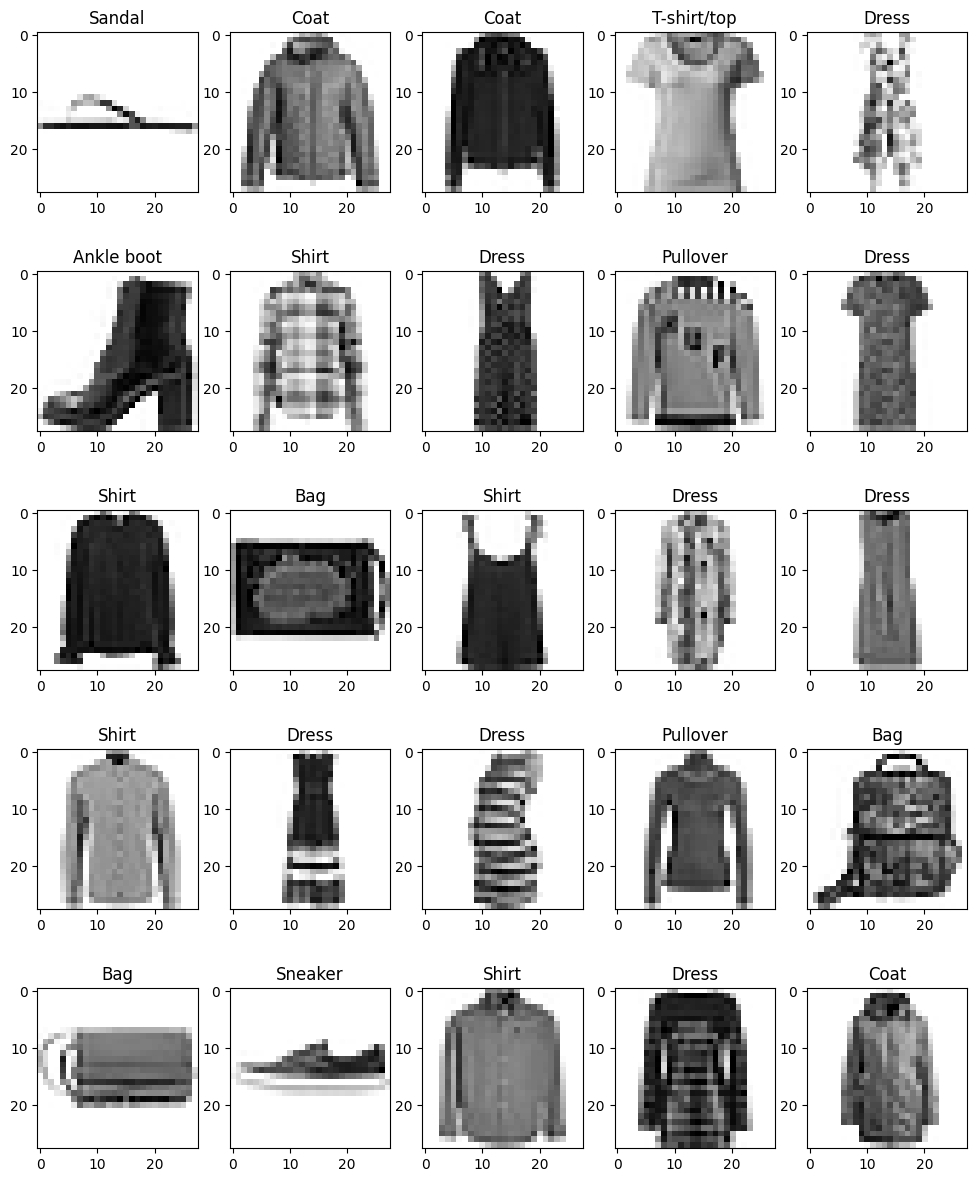

In [8]:
fig, axes = plt.subplots(5, 5, figsize=(12, 15))

for i in range(25):
    img_arr = train.sample(1).values.reshape(785)
    label = img_arr[0]
    pixels = img_arr[1:]
    row = i // 5
    column = i % 5
    axes[row, column].imshow(pixels.reshape((28, 28)), cmap=plt.cm.binary)
    axes[row, column].set_title(class_names[label])


In [9]:
(
    train
    .label
    .replace(class_names)
    .value_counts()
)

label
Pullover       6000
Ankle boot     6000
Shirt          6000
T-shirt/top    6000
Dress          6000
Coat           6000
Sandal         6000
Bag            6000
Sneaker        6000
Trouser        6000
Name: count, dtype: int64

In [10]:
(
    test
    .label
    .replace(class_names)
    .value_counts()
)

label
T-shirt/top    1000
Trouser        1000
Pullover       1000
Dress          1000
Bag            1000
Shirt          1000
Sandal         1000
Coat           1000
Sneaker        1000
Ankle boot     1000
Name: count, dtype: int64

# 3. Data preparation



This is a supervised learning problem, so we will separate the training and testing DataFrames into their respective labels and features.

In [11]:
# X and y from train dataframe
X_train = train.drop('label', axis=1)
y_train = train.label

# X and y from test dataframe
X_test = test.drop('label', axis=1)
y_test = test.label

In [12]:
print('Tamaño features de train: ', X_train.shape)
print('Tamaño labels de train ', y_train.shape)
print('Tamaño features de test: ', X_test.shape)
print('Tamaño labels de test: ', y_test.shape)

Tamaño features de train:  (60000, 784)
Tamaño labels de train  (60000,)
Tamaño features de test:  (10000, 784)
Tamaño labels de test:  (10000,)


It is recommended to normalize pixel values when training image classification algorithms. Normalization helps stabilize training, improve generalization, and prevent overfitting by scaling pixel values to a specific range. We take each pixel and scale its value to a range of [0, 1].

In [13]:
# Normalize data
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

X_train_norm = pd.DataFrame(scaler.fit_transform(X_train))
X_test_norm = pd.DataFrame(scaler.fit_transform(X_test))

We observe normalized data.

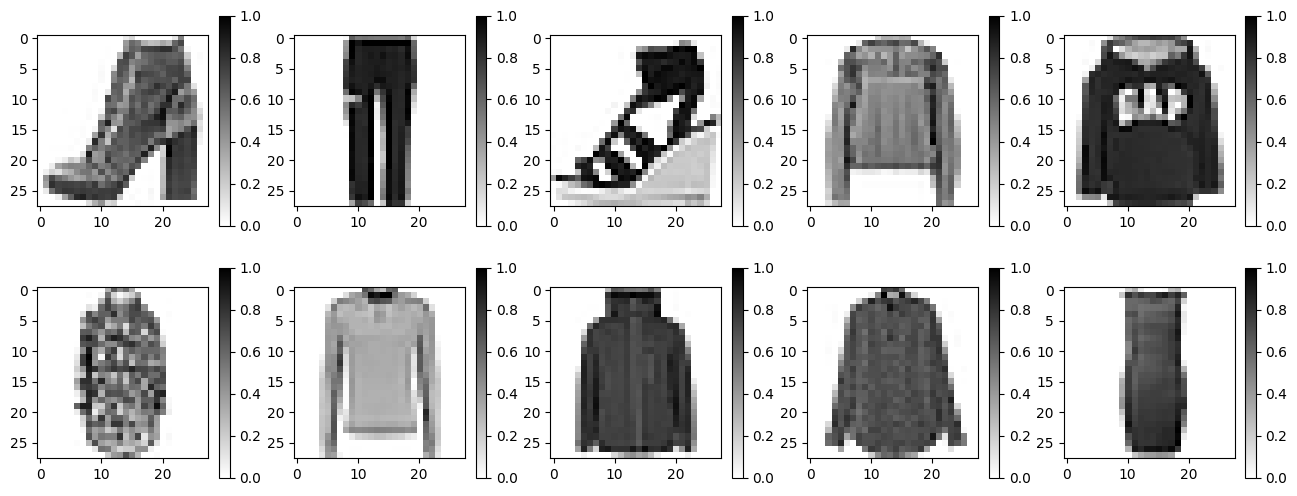

In [14]:
# Show normalized data
fig, axes = plt.subplots(2, 5, figsize=(16, 6))

for i in range(10):
    pixels = X_train_norm.sample(1).values.reshape(784)

    row = i // 5
    column = i % 5

    im = axes[row, column].imshow(pixels.reshape((28, 28)), cmap=plt.cm.binary)
    fig.colorbar(im, ax = axes[row, column])

In [15]:
X_train_norm

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.000000,0.000000,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.006098,0.008811,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.286275,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.627451,0.635294,0.639216,0.529412,0.368627,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [16]:
X_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Finally, we will perform dimensionality reduction on the data using PCA.

In [17]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train_norm)

[Text(0.5, 0, 'Component'), Text(0, 0.5, 'Cumulative Variance')]

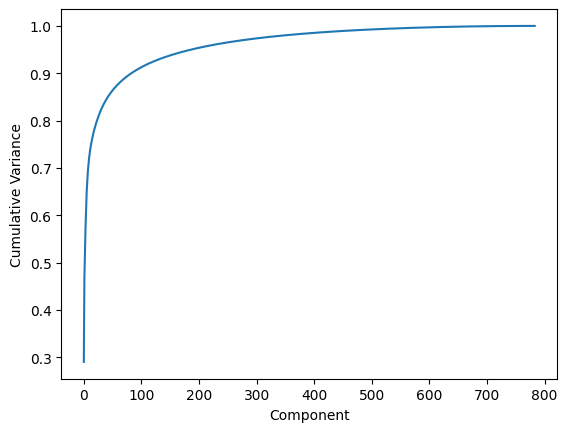

In [18]:
fig, ax = plt.subplots()
ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set(xlabel='Component', ylabel='Cumulative Variance')

It is observed that with around 200 components, It is possible to explain 95% of my data. Let's obtain this result precisely:

In [19]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = (cumulative_variance < 0.95).sum() + 1
n_components

np.int64(188)

In [20]:
pca = PCA(n_components=n_components).fit(X_train_norm)

In [21]:
X_train_t = pca.transform(X_train_norm)
X_train_r = pca.inverse_transform(X_train_t)

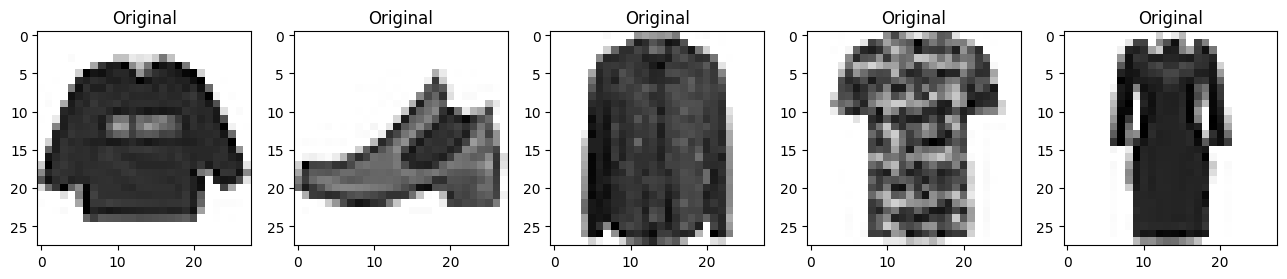

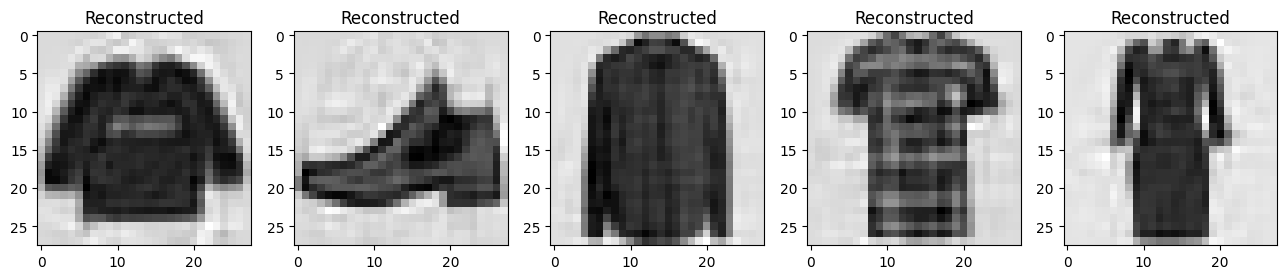

In [22]:
fig, axes = plt.subplots(1, 5, figsize=(16, 3))

for i in range(5):
    pixels = X_train_norm.values[i].reshape(784)
    column = i % 5
    axes[column].imshow(pixels.reshape((28, 28)), cmap=plt.cm.binary)
    axes[column].set_title('Original')

fig, axes = plt.subplots(1, 5, figsize=(16, 3))

for i in range(5):
    pixels = X_train_r[i].reshape(784)
    column = i % 5
    axes[column].imshow(pixels.reshape((28, 28)), cmap=plt.cm.binary)
    axes[column].set_title('Reconstructed')

# 4. Modeling

## 4.1. KNN

In [29]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [64]:
# params = {
#     'n_neighbors': [5, 10, 15, 20],
#     'metric': ['euclidean', 'manhattan']
# }

In [65]:
# knn = neighbors.KNeighborsClassifier()
# grid_search = GridSearchCV(knn, params, cv=3)
# grid_search.fit(X_train_r, y_train)

As a first approach to classifying the data, we propose training 3 models as follows:
- **Model 1**: The original pixels will be used for training.
- **Model 2**: The normalized pixels will be used for training.
- **Model 3**: The normalized and dimensionality-reduced pixels will be used for training.

Performing a grid search requires a very high computational cost. For this reason, it will not be conducted. Instead, since we know from the beginning that our classification problem involves 10 classes, we can set the number of neighbors parameter to 10.

In [66]:
# n_neighbors
n = 10

# knn instances
knn_1 = neighbors.KNeighborsClassifier(n_neighbors=n)
knn_2 = neighbors.KNeighborsClassifier(n_neighbors=n)
knn_3 = neighbors.KNeighborsClassifier(n_neighbors=n)

# Models training
knn_1.fit(X_train, y_train)
knn_2.fit(X_train_norm, y_train)
knn_3.fit(X_train_r, y_train)

# Model prediction
y_pred1 = knn_1.predict(X_test)
y_pred2 = knn_2.predict(X_test_norm)
y_pred3 = knn_3.predict(X_test_norm)

In [67]:
# Class names
target_names = list(class_names.values())

# Score
report_1 = (classification_report(y_test, y_pred1, digits=4, target_names=target_names))
report_2 = (classification_report(y_test, y_pred2, digits=4, target_names=target_names))
report_3 = (classification_report(y_test, y_pred3, digits=4, target_names=target_names))

# Print
print("Score of the model trained with original pixels: \n\n", report_1)
print("Score of the model trained with normalized pixels: \n\n", report_2)
print("Score of the model trained with dimensionality-reduced pixels: \n\n", report_3)

Score of the model trained with original pixels: 

               precision    recall  f1-score   support

 T-shirt/top     0.7696    0.8750    0.8189      1000
     Trouser     0.9877    0.9650    0.9762      1000
    Pullover     0.7516    0.8110    0.7802      1000
       Dress     0.9068    0.8850    0.8957      1000
        Coat     0.7942    0.7990    0.7966      1000
      Sandal     0.9938    0.7980    0.8852      1000
       Shirt     0.6741    0.5770    0.6218      1000
     Sneaker     0.8573    0.9490    0.9008      1000
         Bag     0.9754    0.9520    0.9636      1000
  Ankle boot     0.8883    0.9620    0.9237      1000

    accuracy                         0.8573     10000
   macro avg     0.8599    0.8573    0.8563     10000
weighted avg     0.8599    0.8573    0.8563     10000

Score of the model trained with normalized pixels: 

               precision    recall  f1-score   support

 T-shirt/top     0.7687    0.8740    0.8180      1000
     Trouser     0.9877   

As observed, the best results are obtained when using the dataset that was dimensionality-reduced using PCA.

## 4.2 Decision Three Classifier

A preliminary experiment is conducted where different parameter values are manually reviewed and tested, achieving better performance values.

Subsequently, specific hyperparameters are tested on the different types of available data (raw, normalized, dimensionality-reduced).

Finally, cross-validation is performed to determine the best dataset.

The most important hyperparameters to experiment with are: Max Depth, criterion, min_impurity decrease, and min sample leafs.

### 4.2.1. Estimation of Max Depth Hyperparameter

Below, we observe how the best hyperparameter (Max Depth) was estimated, and the generalized and training errors are plotted as it increases.

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [24]:
# Function to visualize the learning curve based
# on the training and generalization error.
def plot_learning_curve(train_error, generalization_error):
  n = len(train_error)
  if len(train_error) != len(generalization_error):
    print("The training and generalization error sequences must be of the same length.")
    return

  balance_point = np.array(generalization_error).argmin() + 1
  plt.figure(figsize = (8, 5), dpi = 105)

  plt.plot(range(1, n + 1), train_error, label="Training")
  plt.plot(range(1, n + 1), generalization_error, label="Generalization")
  plt.xticks(range(0, n + 1, 2))
  plt.xlabel("Max depth")
  plt.ylabel("Error")
  y_min, y_max = plt.gca().get_ylim()
  plt.vlines(balance_point, y_min, y_max, colors = ['red'], linestyles = ['dashdot'])
  plt.ylim([y_min, y_max])
  plt.text(balance_point + 1, 0.165, 'Balance point')
  plt.legend()

In [25]:
# Integers from 1 to 20 as possible values for the depth hyperparameter.
max_depth_values = np.arange(1, 21, 1)

# Empty arrays to store the training and generalization errors.
train_error = np.empty(len(max_depth_values))
generalization_error = np.empty(len(max_depth_values))


for depth in max_depth_values:
    # We train a decision tree for each depth value.
    decision_tree = DecisionTreeClassifier(max_depth=depth)
    decision_tree.fit(X_train, y_train)

    # We store the training and generalization errors for each tree.
    train_error[depth - 1] = (1 - decision_tree.score(X_train, y_train))
    generalization_error[depth - 1] = (1 - decision_tree.score(X_test, y_test))

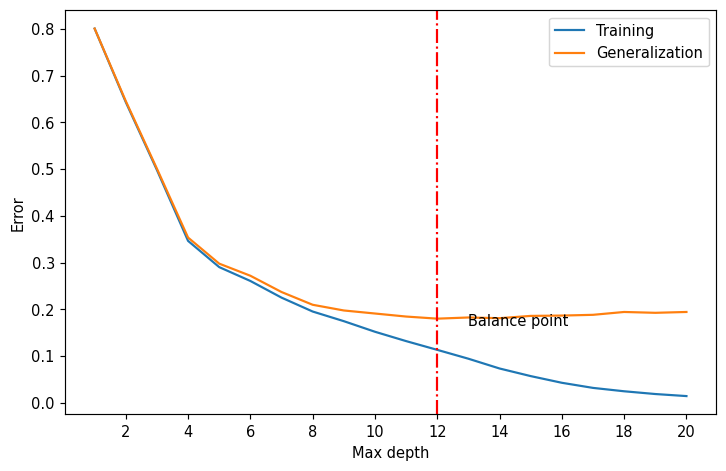

In [26]:
plot_learning_curve(train_error, generalization_error)

### 4.2.2. Model Comparison

Three models are trained with parameters chosen after manual experimentation:

- **Model 1**: The original pixels will be used for training.
- **Model 2**: The normalized pixels will be used for training.
- **Model 3**: The normalized and dimensionality-reduced pixels will be used for training.

This is done to determine which model has the lowest error and thus select the model for cross-validation.

In [27]:
decision_three_1 = DecisionTreeClassifier( max_depth=12,
                                            min_impurity_decrease=0.0001,
                                             criterion= 'entropy',
                                            min_samples_leaf=8
                                             )
decision_three_2 = DecisionTreeClassifier( max_depth=12,
                                            min_impurity_decrease=0.0001,
                                             criterion= 'entropy',
                                            min_samples_leaf=8
                                             )
decision_three_3 = DecisionTreeClassifier( max_depth=12,
                                            min_impurity_decrease=0.0001,
                                             criterion= 'entropy',
                                            min_samples_leaf=8
                                             )

# Models training
decision_three_1.fit(X_train, y_train)
decision_three_2.fit(X_train_norm, y_train)
decision_three_3.fit(X_train_r, y_train)

# Model prediction
y_pred1 = decision_three_1.predict(X_test)
y_pred2 = decision_three_2.predict(X_test_norm)
y_pred3 = decision_three_3.predict(X_test_norm)

In [30]:
# Class names
target_names = list(class_names.values())

# Score
report_1 = (classification_report(y_test, y_pred1, digits=4, target_names=target_names))
report_2 = (classification_report(y_test, y_pred2, digits=4, target_names=target_names))
report_3 = (classification_report(y_test, y_pred3, digits=4, target_names=target_names))

# Print
print("Score of the model trained with original pixels: \n\n", report_1)
print("Score of the model trained with normalized pixels: \n\n", report_2)
print("Score of the model trained with dimensionality-reduced pixels: \n\n", report_3)

Score of the model trained with original pixels: 

               precision    recall  f1-score   support

 T-shirt/top     0.7528    0.8040    0.7776      1000
     Trouser     0.9419    0.9560    0.9489      1000
    Pullover     0.7124    0.7110    0.7117      1000
       Dress     0.8411    0.8470    0.8440      1000
        Coat     0.7190    0.7550    0.7366      1000
      Sandal     0.9136    0.8880    0.9006      1000
       Shirt     0.6172    0.5370    0.5743      1000
     Sneaker     0.8463    0.9030    0.8737      1000
         Bag     0.9417    0.9200    0.9307      1000
  Ankle boot     0.9139    0.8920    0.9028      1000

    accuracy                         0.8213     10000
   macro avg     0.8200    0.8213    0.8201     10000
weighted avg     0.8200    0.8213    0.8201     10000

Score of the model trained with normalized pixels: 

               precision    recall  f1-score   support

 T-shirt/top     0.7535    0.8010    0.7765      1000
     Trouser     0.9437   

All data without normalization or resizing is selected, and cross-validation is performed.

### 4.2.3. Cross-Validation with Grid Search CV


In [31]:
# Hyperparameters must be in the form of a dictionary.
param_grid = {'criterion':     ['gini','entropy'],
              'min_impurity_decrease': [0.00001,0.0001,0.001,0.01,0.1,],
              'min_samples_leaf': [1,2,4,8,10],
              'max_features': range(20,100,20),
              'max_depth': [12,],
              }

param_grid

{'criterion': ['gini', 'entropy'],
 'min_impurity_decrease': [1e-05, 0.0001, 0.001, 0.01, 0.1],
 'min_samples_leaf': [1, 2, 4, 8, 10],
 'max_features': range(20, 100, 20),
 'max_depth': [12]}

In [32]:
# Grid search for hyperparameters.
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(DecisionTreeClassifier( ),
                   param_grid=param_grid,
                   return_train_score=True,
                   cv=3
                   )

grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [12],
                         'max_features': range(20, 100, 20),
                         'min_impurity_decrease': [1e-05, 0.0001, 0.001, 0.01,
                                                   0.1],
                         'min_samples_leaf': [1, 2, 4, 8, 10]},
             return_train_score=True)

In [33]:
# Best parameters identified.
print(grid_clf.best_params_)

{'criterion': 'entropy', 'max_depth': 12, 'max_features': 80, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 2}


In [34]:
grid_clf.best_score_

np.float64(0.8076666666666666)

## 4.3 Random Forest

The Random Forest algorithm is trained, which combines the results of different decision trees to produce a more robust outcome. This model uses the same hyperparameters defined in the previous decision tree. This process is performed 3 times for the datasets defined earlier, with the goal of establishing the best metrics.

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [79]:
random_forest_1 =  RandomForestClassifier(n_estimators=100,
                                       max_depth=12,
                                       min_impurity_decrease=0.0001,
                                       criterion= 'entropy',
                                       min_samples_leaf=8)
random_forest_2 =  RandomForestClassifier(n_estimators=100,
                                       max_depth=12,
                                       min_impurity_decrease=0.0001,
                                       criterion= 'entropy',
                                       min_samples_leaf=8)
random_forest_3 =  RandomForestClassifier(n_estimators=100,
                                       max_depth=12,
                                       min_impurity_decrease=0.0001,
                                       criterion= 'entropy',
                                       min_samples_leaf=8)

# Models training
random_forest_1.fit(X_train, y_train)
random_forest_2.fit(X_train_norm, y_train)
random_forest_3.fit(X_train_r, y_train)

# Model prediction
y_pred1 = random_forest_1.predict(X_test)
y_pred2 = random_forest_2.predict(X_test_norm)
y_pred3 =random_forest_3.predict(X_test_norm)

In [80]:
# Class names
target_names = list(class_names.values())

# Score
report_1 = (classification_report(y_test, y_pred1, digits=4, target_names=target_names))
report_2 = (classification_report(y_test, y_pred2, digits=4, target_names=target_names))
report_3 = (classification_report(y_test, y_pred3, digits=4, target_names=target_names))

# Print
print("Score of the model trained with original pixels: \n\n", report_1)
print("Score of the model trained with normalized pixels: \n\n", report_2)
print("Score of the model trained with dimensionality-reduced pixels: \n\n", report_3)

Score of the model trained with original pixels: 

               precision    recall  f1-score   support

 T-shirt/top     0.7890    0.8490    0.8179      1000
     Trouser     0.9918    0.9620    0.9766      1000
    Pullover     0.7734    0.7780    0.7757      1000
       Dress     0.8726    0.9250    0.8981      1000
        Coat     0.7605    0.8480    0.8019      1000
      Sandal     0.9706    0.9260    0.9478      1000
       Shirt     0.7420    0.5550    0.6350      1000
     Sneaker     0.9014    0.9140    0.9076      1000
         Bag     0.9455    0.9710    0.9581      1000
  Ankle boot     0.9146    0.9420    0.9281      1000

    accuracy                         0.8670     10000
   macro avg     0.8661    0.8670    0.8647     10000
weighted avg     0.8661    0.8670    0.8647     10000

Score of the model trained with normalized pixels: 

               precision    recall  f1-score   support

 T-shirt/top     0.7921    0.8570    0.8232      1000
     Trouser     0.9877   

## 4.4 Neural network

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [25]:
neural_network_1 = MLPClassifier(solver='adam',
                    activation='relu',    # Activation function.
                    max_iter=1000,        # Maximum number of iterations allowed.
                    hidden_layer_sizes=(150,50),
                    learning_rate='adaptive',
                    early_stopping=True,
                    alpha=0.01,
                    )
neural_network_2 = MLPClassifier(solver='adam',
                    activation='relu',    # Activation function.
                    max_iter=1000,        # Maximum number of iterations allowed.
                    hidden_layer_sizes=(150,50),
                    learning_rate='adaptive',
                    early_stopping=True,
                    alpha=0.01,
                    )
neural_network_3 = MLPClassifier(solver='adam',
                    activation='relu',    # Activation function.
                    max_iter=1000,        # Maximum number of iterations allowed.
                    hidden_layer_sizes=(150,50),
                    learning_rate='adaptive',
                    early_stopping=True,
                    alpha=0.01,
                    )

# Models training
neural_network_1.fit(X_train, y_train)
neural_network_2.fit(X_train_norm, y_train)
neural_network_3.fit(X_train_r, y_train)

# Model prediction
y_pred1 = neural_network_1.predict(X_test)
y_pred2 = neural_network_2.predict(X_test_norm)
y_pred3 = neural_network_3.predict(X_test_norm)

In [26]:
# Class names
target_names = list(class_names.values())

# Score
report_1 = (classification_report(y_test, y_pred1, digits=4, target_names=target_names))
report_2 = (classification_report(y_test, y_pred2, digits=4, target_names=target_names))
report_3 = (classification_report(y_test, y_pred3, digits=4, target_names=target_names))

# Print
print("Score of the model trained with original pixels: \n\n", report_1)
print("Score of the model trained with normalized pixels: \n\n", report_2)
print("Score of the model trained with dimensionality-reduced pixels: \n\n", report_3)

Score of the model trained with original pixels: 

               precision    recall  f1-score   support

 T-shirt/top     0.8472    0.8150    0.8308      1000
     Trouser     0.9782    0.9890    0.9836      1000
    Pullover     0.8521    0.7780    0.8134      1000
       Dress     0.8969    0.9130    0.9049      1000
        Coat     0.8254    0.7940    0.8094      1000
      Sandal     0.9752    0.9450    0.9599      1000
       Shirt     0.6538    0.7460    0.6969      1000
     Sneaker     0.9096    0.9660    0.9370      1000
         Bag     0.9658    0.9590    0.9624      1000
  Ankle boot     0.9670    0.9370    0.9518      1000

    accuracy                         0.8842     10000
   macro avg     0.8871    0.8842    0.8850     10000
weighted avg     0.8871    0.8842    0.8850     10000

Score of the model trained with normalized pixels: 

               precision    recall  f1-score   support

 T-shirt/top     0.8418    0.8090    0.8251      1000
     Trouser     0.9889   

In [27]:
# Hyperparameters must be in the form of a dictionary.
param_grid = {'solver': ['adam'],
              'activation' : ['relu','tanh'],
              'max_iter' : [500,1000],
              'hidden_layer_sizes': [(100,50),(100,100),(150,100)],
              'alpha' : [0.0001,0.001,0.01,0.1],
              'learning_rate' : ['adaptive'],
              'early_stopping' : [True],
              }

param_grid

{'solver': ['adam'],
 'activation': ['relu', 'tanh'],
 'max_iter': [500, 1000],
 'hidden_layer_sizes': [(100, 50), (100, 100), (150, 100)],
 'alpha': [0.0001, 0.001, 0.01, 0.1],
 'learning_rate': ['adaptive'],
 'early_stopping': [True]}

In [30]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

NN_classifier_2 = MLPClassifier(
                    )

# Define a reduced search space
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],  # Only 2 options
    'activation': ['relu'],                 # Only one activation function
    'solver': ['adam'],                     # Only one optimizer
    'alpha': [0.0001, 0.001],               # Only 2 regularization values
}

# Configure RandomizedSearchCV with parallelism
grid_clf = RandomizedSearchCV(
    NN_classifier_2,
    param_distributions=param_grid,
    n_iter=10,  # Test only 10 random combinations
    cv=3,       # 3-fold cross-validation
    n_jobs=-1   # Use all available CPU cores
)

# Fit the model
grid_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'activation': ['relu'],
                                        'alpha': [0.0001, 0.001],
                                        'hidden_layer_sizes': [(50,), (100,)],
                                        'solver': ['adam']})

In [31]:
# Best parameters identified.
print(grid_clf.best_params_)

{'solver': 'adam', 'hidden_layer_sizes': (100,), 'alpha': 0.0001, 'activation': 'relu'}


In [32]:
print(grid_clf.best_score_)

0.8574666666666667


# 5. Evaluation

### Comparison of Metrics for the Trained Models

In [81]:
import seaborn as sns

data_precision = {
    "precision": ['KNN', 'Decision Three Classifier', 'Random Forest', 'Neural Network(MLP)'],
    "values": [86.67, 82.00, 86.82, 89.25]
}

data_recall = {
    "recall": ['KNN', 'Decision Three Classifier', 'Random Forest', 'Neural Network(MLP)'],
    "values": [85.73, 82.14, 86.88, 89.23]
}

data_f1_score = {
    "f1-score": ['KNN', 'Decision Three Classifier', 'Random Forest', 'Neural Network(MLP)'],
    "values": [86.51, 82.02, 86.65, 89.13]
}

def metric_grafic(df, metric):
    plt.figure(figsize=(8, 4))
    sns.set(style="whitegrid")

    # Load bars graph
    barplot = sns.barplot(x=metric, y='values', data=df)

    titulo = metric.capitalize()
    plt.title(titulo, fontsize=18)
    plt.xlabel("Model", fontsize=14)
    plt.ylabel("Values (%)", fontsize=14)
    plt.xticks(fontsize=7, rotation=30)
    plt.yticks(fontsize=7)

    # Bars above labels
    for index, row in df.iterrows():
        value_as_percentage = f'{row["values"]:.2f}%'
        barplot.text(index, row['values'], value_as_percentage, color='black', ha="center", fontsize=10)

df_precision = pd.DataFrame(data_precision)
df_recall = pd.DataFrame(data_recall)
df_f1_score = pd.DataFrame(data_f1_score)

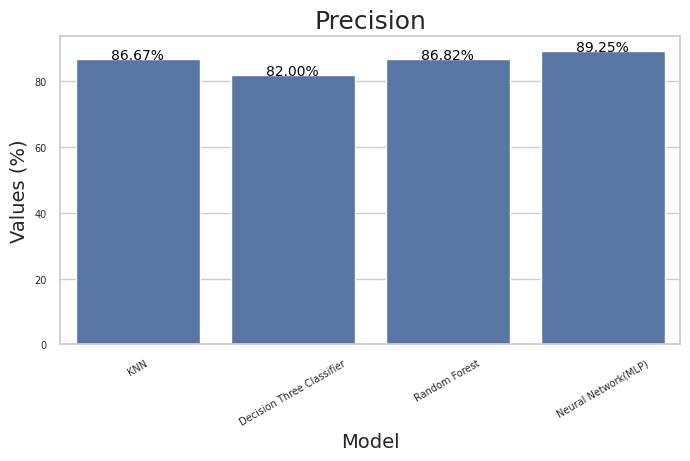

In [82]:
metric_grafic(df_precision, "precision")

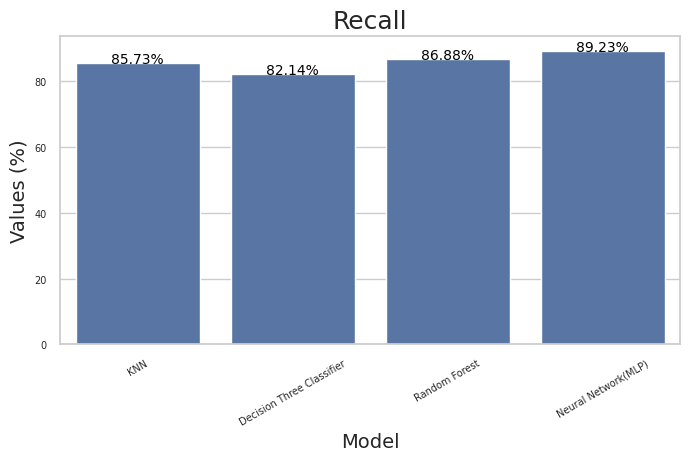

In [83]:
metric_grafic(df_recall, "recall")

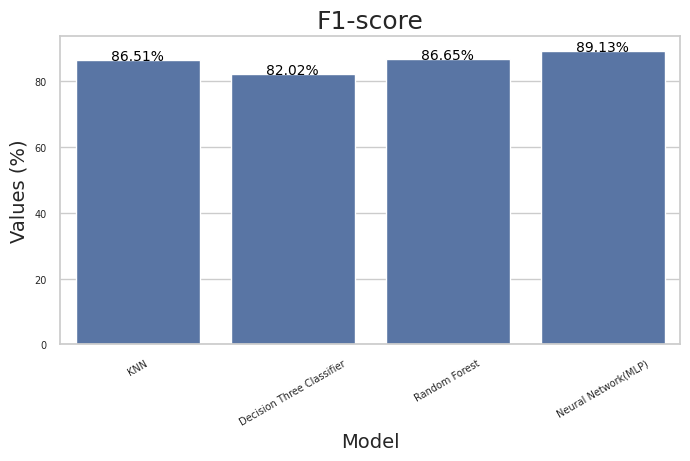

In [84]:
metric_grafic(df_f1_score, "f1-score")

# 6. Model Exports

In this section, the models are exported in .pkl format so they can be used outside the notebook.

## 6.1 KNN

In [85]:
from joblib import dump

# Save model to .pks
dump(knn_3, '../models/knn.pkl')

['knn.pkl']

## 6.2 Decision Three Classifier

In [86]:
# Save model to .pks
dump(decision_three_1, '../models/tree.pkl')

['tree.pkl']

## 6.3 Random Forest

In [87]:
# Save model to .pks
dump(random_forest_1, '../models/random_forest.pkl')

['random_forest.pkl']

## 6.4 Red Neuronal

In [88]:
# Save model to .pks
dump(neural_network_2,  '../models/nn.pkl')

['nn.pkl']